<a href="https://colab.research.google.com/github/Tushar-Keshari/Deep-Learning/blob/main/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, datasets, models

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape
x_test.shape


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

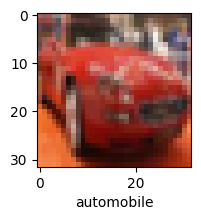

In [9]:
plot_sample(x_train, y_train, 5)

In [10]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [11]:
#model formation layers code using ANN network
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2755 - loss: 2.2355
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3939 - loss: 1.6864
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4251 - loss: 1.6024
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4454 - loss: 1.5414
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4624 - loss: 1.4962


In [12]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4631 - loss: 1.5047


[1.509511113166809, 0.4616999924182892]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.44      0.63      0.51      1000
           1       0.61      0.54      0.57      1000
           2       0.37      0.31      0.34      1000
           3       0.30      0.44      0.35      1000
           4       0.49      0.31      0.38      1000
           5       0.40      0.28      0.33      1000
           6       0.49      0.50      0.49      1000
           7       0.60      0.44      0.51      1000
           8       0.51      0.64      0.57      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



In [16]:
#model formation layers code using CNN network
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((3,3)),
    # layers.Conv2D(),
    # layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3743 - loss: 1.7187
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5733 - loss: 1.2088
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6317 - loss: 1.0517
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6723 - loss: 0.9431
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7007 - loss: 0.8695
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7101 - loss: 0.8337
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7311 - loss: 0.7688
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7432 - loss: 0.7401
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7547 - loss: 0.7009
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7660 - loss: 0.6724
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7808 - loss: 0.6321
Epoch 12/20
1563/1563 ━━━━━━━━

In [17]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6976 - loss: 1.0096


[1.0159780979156494, 0.6929000020027161]

In [19]:
y_classes = [np.argmax(elements) for elements in y_pred]

In [20]:
print("Classification Report: \n" , classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.63      0.51      1000
           1       0.61      0.54      0.57      1000
           2       0.37      0.31      0.34      1000
           3       0.30      0.44      0.35      1000
           4       0.49      0.31      0.38      1000
           5       0.40      0.28      0.33      1000
           6       0.49      0.50      0.49      1000
           7       0.60      0.44      0.51      1000
           8       0.51      0.64      0.57      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000

